In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data = pd.read_csv("../data/supply_chain_data.csv")
data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.isnull().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
data.select_dtypes(include=['object']).columns


Index(['Product type', 'SKU', 'Customer demographics', 'Shipping carriers',
       'Supplier name', 'Location', 'Inspection results',
       'Transportation modes', 'Routes'],
      dtype='object')

In [7]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [8]:
target = 'Number of products sold'
X = data_encoded.drop(columns=[target])
y = data_encoded[target]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2
)


Epoch 1/50


C:\Users\PC\anaconda3\envs\supplychain\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - loss: 297302.6875 - val_loss: 288796.5625
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 296862.1875 - val_loss: 288471.9062
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 296511.6875 - val_loss: 288138.3750
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 296147.2500 - val_loss: 287783.0625
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 295737.8125 - val_loss: 287414.5938
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 295266.3750 - val_loss: 287009.6250
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 294711.1875 - val_loss: 286583.1562
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 294079.0312 - val_loss: 286120.9375
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 293382.0000 - val_loss: 285606.4375
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 292540.0000 - val_loss: 285033.3125
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 291595.0938 - val_

In [12]:
target = 'Number of products sold'
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # just to confirm scaling worked


array([[ 0.91555259, -1.08507926, -1.07773616,  1.61657846, -0.56552631,
        -1.36512818, -0.27602375, -0.23535309,  1.14282314,  1.31113036,
        -1.14914036, -0.5246626 ,  1.47321042, -0.71300553,  1.52752523,
        -0.83793058, -0.11250879,  0.        , -0.11250879,  0.        ,
        -0.11250879, -0.11250879, -0.11250879, -0.11250879, -0.11250879,
         0.        , -0.11250879, -0.11250879, -0.11250879, -0.11250879,
         0.        , -0.11250879, -0.11250879, -0.11250879, -0.11250879,
        -0.11250879, -0.11250879, -0.11250879, -0.11250879,  0.        ,
         0.        , -0.11250879,  0.        , -0.11250879, -0.11250879,
        -0.11250879, -0.11250879, -0.11250879,  0.        ,  0.        ,
        -0.11250879, -0.11250879, -0.11250879, -0.11250879,  0.        ,
         0.        , -0.11250879, -0.11250879, -0.11250879, -0.11250879,
        -0.11250879, -0.11250879, -0.11250879, -0.11250879,  0.        ,
        -0.11250879,  8.88819442, -0.11250879, -0.1

In [14]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



In [15]:
model.compile(optimizer='adam', loss='mse')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,                # increase if you want
    batch_size=16,             # try 16 or 32
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 297053.4062 - val_loss: 288497.9688
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 296311.1875 - val_loss: 287943.7188
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 295589.4375 - val_loss: 287327.0625
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 294677.7812 - val_loss: 286560.9062
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 293551.3750 - val_loss: 285600.1875
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 292133.4375 - val_loss: 284391.2188
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 290120.1875 - val_loss: 282899.2812
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 287640.3438 - val_loss: 281072.7500
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 284441.2812 - val_loss: 278862.8125
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 279822.1875 - val_loss: 276226.4688
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Test MSE: 135621.71875
Test R2: -0.42114150524139404


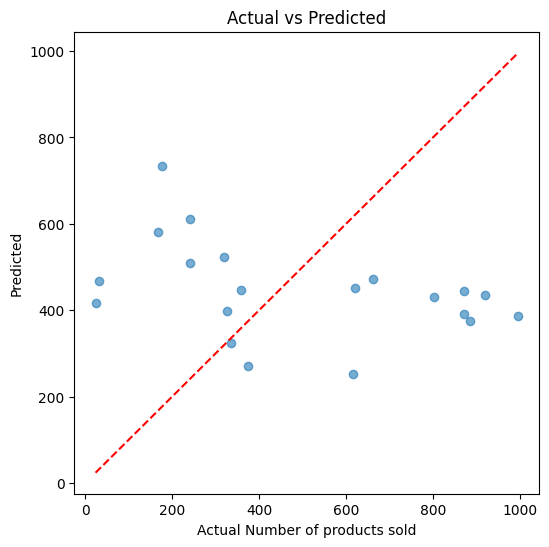

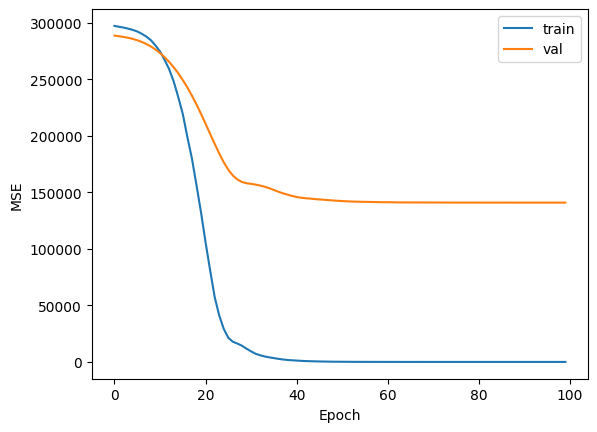

In [16]:
# Predictions on test set
test_preds = model.predict(X_test_scaled).flatten()

# MSE
from sklearn.metrics import mean_squared_error, r2_score
mse_test = mean_squared_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Test MSE:", mse_test)
print("Test R2:", r2)

# Scatter plot (true vs pred)
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Number of products sold')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.show()


In [17]:
model.save('../model/demand_forecasting_model.h5')
# Load later with:
# loaded = keras.models.load_model('../model/demand_forecasting_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Test MSE: 135621.71875
Test MAE: 326.0419921875
Test R2: -0.42114150524139404


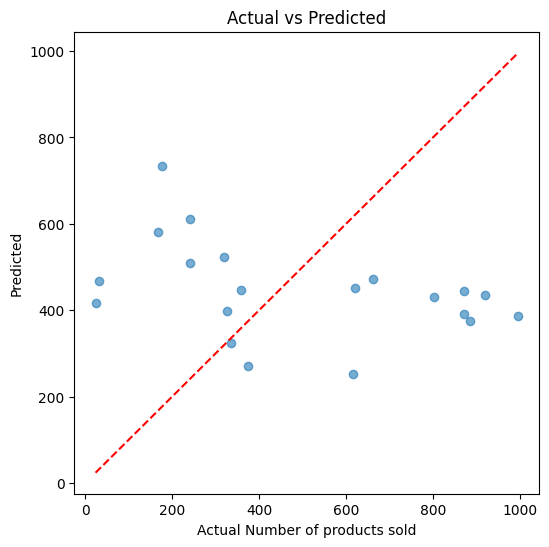

In [18]:
# Predictions
test_preds = model.predict(X_test_scaled).flatten()

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse_test = mean_squared_error(y_test, test_preds)
mae_test = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

print("Test MSE:", mse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2)

# Scatter plot true vs pred
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Number of products sold')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [19]:
# save model in native keras format
model.save('../model/demand_forecasting_model.keras')

# save scaler
import joblib
joblib.dump(scaler, '../model/scaler.save')


['../model/scaler.save']

In [20]:
def predict_single_row(df_row, model, scaler, feature_columns):
    """
    df_row: pandas DataFrame with a single row containing original (non-encoded) columns
    feature_columns: list of columns used in training (the columns of X)
    """
    # If you trained on data_encoded, ensure df_row is encoded the same way:
    row_encoded = pd.get_dummies(df_row)
    # reindex to match training columns (missing cols -> 0)
    row_encoded = row_encoded.reindex(columns=feature_columns, fill_value=0)
    X = scaler.transform(row_encoded.values)
    pred = model.predict(X).flatten()[0]
    return pred

# Example usage:
feature_columns = X.columns  # save this list when training
# pred = predict_single_row(df_row, loaded_model, loaded_scaler, feature_columns)


In [21]:
import json
feature_columns = list(X.columns)   # X is your training features dataframe from notebook
with open('../feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)


In [22]:
# app/dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json
from tensorflow import keras

st.set_page_config(page_title="Supply Chain Demand Forecast", layout="wide")

@st.cache_resource
def load_model_and_artifacts():
    model = keras.models.load_model('../model/demand_forecasting_model.keras')
    scaler = joblib.load('../model/scaler.save')
    with open('../feature_columns.json', 'r') as f:
        feature_columns = json.load(f)
    # load a sample df for EDA (optional)
    df_sample = pd.read_csv('../data/supply_chain_data.csv')
    return model, scaler, feature_columns, df_sample

model, scaler, feature_columns, df_sample = load_model_and_artifacts()

st.title("Supply Chain: Demand Forecasting Demo")
st.write("This demo predicts **Number of products sold** for a single item using the trained model.")

# Sidebar: quick controls
with st.sidebar:
    st.header("Controls")
    show_head = st.checkbox("Show dataset head", value=True)
    show_eda = st.checkbox("Show basic EDA", value=True)
    st.write("Upload a CSV with one or more rows to predict or use the interactive form below.")
    st.markdown("---")
    st.caption("App expects same columns used during training. The app will attempt to one-hot encode and align columns.")

# Section 1: dataset preview / EDA
if show_head:
    st.subheader("Dataset preview")
    st.dataframe(df_sample.head())

if show_eda:
    st.subheader("Simple EDA")
    col1, col2 = st.columns(2)
    with col1:
        if 'Revenue generated' in df_sample.columns:
            st.write("Revenue distribution")
            st.bar_chart(df_sample['Revenue generated'].value_counts().head(20))
    with col2:
        if 'Production volumes' in df_sample.columns:
            st.write("Production volumes (sample)")
            st.line_chart(df_sample['Production volumes'].head(50))

st.markdown("---")

# Helper function: align and scale dataframe
def prepare_rows_for_prediction(df_rows, feature_columns, scaler):
    """
    df_rows : DataFrame (raw rows)
    Returns scaled numpy array aligned with trained feature columns
    """
    # one-hot encode the uploaded rows (same method used during training)
    df_enc = pd.get_dummies(df_rows)
    # reindex to training columns: missing columns -> 0, extra columns ignored
    df_enc = df_enc.reindex(columns=feature_columns, fill_value=0)
    X_scaled = scaler.transform(df_enc.values)
    return X_scaled, df_enc

# Section 2: Upload CSV and predict
st.subheader("Upload CSV to predict (multiple rows supported)")
uploaded_file = st.file_uploader("Upload a CSV file with rows similar to the training data", type=['csv'])
if uploaded_file is not None:
    df_uploaded = pd.read_csv(uploaded_file)
    st.write("Uploaded rows:", df_uploaded.shape[0])
    st.dataframe(df_uploaded.head())
    try:
        X_scaled, df_enc = prepare_rows_for_prediction(df_uploaded, feature_columns, scaler)
        preds = model.predict(X_scaled).flatten()
        df_out = df_uploaded.copy()
        df_out['Predicted_Number_of_products_sold'] = preds
        st.success("Prediction complete")
        st.dataframe(df_out.head(10))
        # allow user to download CSV of results
        csv = df_out.to_csv(index=False).encode('utf-8')
        st.download_button("Download predictions CSV", csv, "predictions.csv", "text/csv")
    except Exception as e:
        st.error("Error during prediction: " + str(e))

st.markdown("---")

# Section 3: Interactive single-row prediction via form
st.subheader("Interactive single-row prediction")
with st.form("single_row_form"):
    cols = st.columns(3)
    # show a few common inputs; to support all features you'd add inputs dynamically
    # Example for some columns in your dataset:
    product_type = cols[0].selectbox("Product type", options=sorted(df_sample['Product type'].unique()))
    price = cols[1].number_input("Price", min_value=0.0, value=float(df_sample['Price'].median()))
    availability = cols[2].number_input("Availability", min_value=0, value=int(df_sample['Availability'].median()))
    customer_demo = st.selectbox("Customer demographics", options=sorted(df_sample['Customer demographics'].unique()))
    location = st.selectbox("Location", options=sorted(df_sample['Location'].unique()))
    submit = st.form_submit_button("Predict")

if submit:
    # build a single-row DataFrame matching original raw columns
    df_row = pd.DataFrame([{
        'Product type': product_type,
        'Price': price,
        'Availability': availability,
        'Customer demographics': customer_demo,
        'Location': location
    }])
    st.write("Input row:")
    st.write(df_row)
    try:
        X_scaled, df_enc = prepare_rows_for_prediction(df_row, feature_columns, scaler)
        pred = model.predict(X_scaled).flatten()[0]
        st.success(f"Predicted number of products sold: {pred:.2f}")
    except Exception as e:
        st.error("Prediction error: " + str(e))

st.markdown("---")
st.caption("Note: For reliable production usage, validate that uploaded rows contain the expected raw columns. This demo attempts to align features and may set missing one-hot columns to 0.")


2025-12-12 15:18:00.164 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 15:18:00.165 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 15:18:01.263 
  command:

    streamlit run C:\Users\PC\anaconda3\envs\supplychain\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-12 15:18:01.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 15:18:01.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-12 15:18:01.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\PC\anaconda3\envs\supplychain\lib\site-packages\keras\src\saving\saving_lib.py:797: U

DeltaGenerator(_form_data=FormData(form_id='single_row_form'))

In [23]:
import json

feature_columns = list(X.columns)  # X is your encoded features dataframe

with open('../feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)


Training RandomForest...
RandomForest Results:
MSE : 160405.0258233333
MAE : 359.62933333333336
R2  : -0.6808389221615809


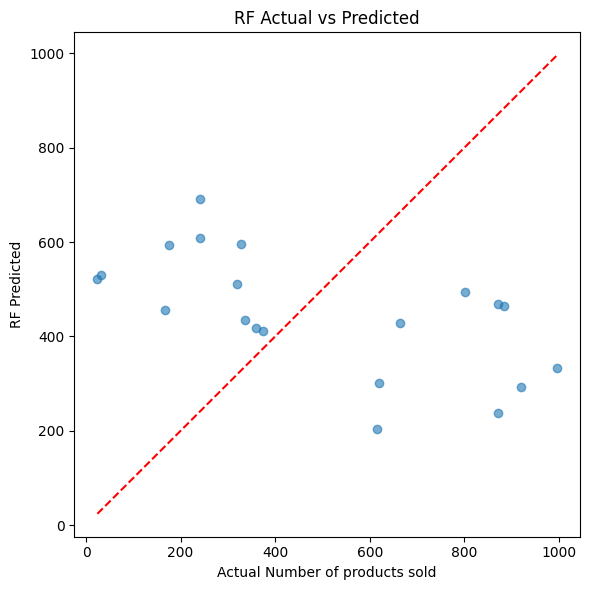

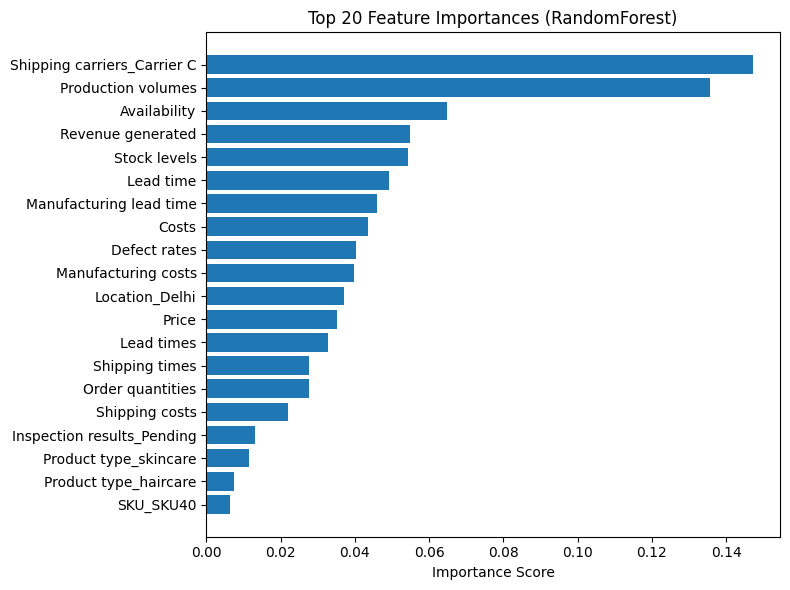

Saved:
 - reports/rf_actual_vs_pred.png
 - reports/rf_feature_importances.png


In [24]:
# ============================
# RandomForest Model Comparison
# ============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

print("Training RandomForest...")

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# ===== Metrics =====
mse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print("RandomForest Results:")
print("MSE :", mse_rf)
print("MAE :", mae_rf)
print("R2  :", r2_rf)

# ================================
# Save RF Actual vs Predicted Plot
# ================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Number of products sold")
plt.ylabel("RF Predicted")
plt.title("RF Actual vs Predicted")
plt.tight_layout()
plt.savefig("../reports/rf_actual_vs_pred.png", bbox_inches='tight')
plt.show()

# ======================
# Feature Importance Plot
# ======================
importances = rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

plt.figure(figsize=(8,6))
plt.title("Top 20 Feature Importances (RandomForest)")
plt.barh(range(len(indices)), importances[indices][::-1])
plt.yticks(range(len(indices)), [feat_names[i] for i in indices[::-1]])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("../reports/rf_feature_importances.png", bbox_inches='tight')
plt.show()

print("Saved:")
print(" - reports/rf_actual_vs_pred.png")
print(" - reports/rf_feature_importances.png")


In [25]:
import pathlib

print("RF actual vs predicted PNG exists:", pathlib.Path("../reports/rf_actual_vs_pred.png").exists())
print("RF feature importances PNG exists:", pathlib.Path("../reports/rf_feature_importances.png").exists())


RF actual vs predicted PNG exists: True
RF feature importances PNG exists: True


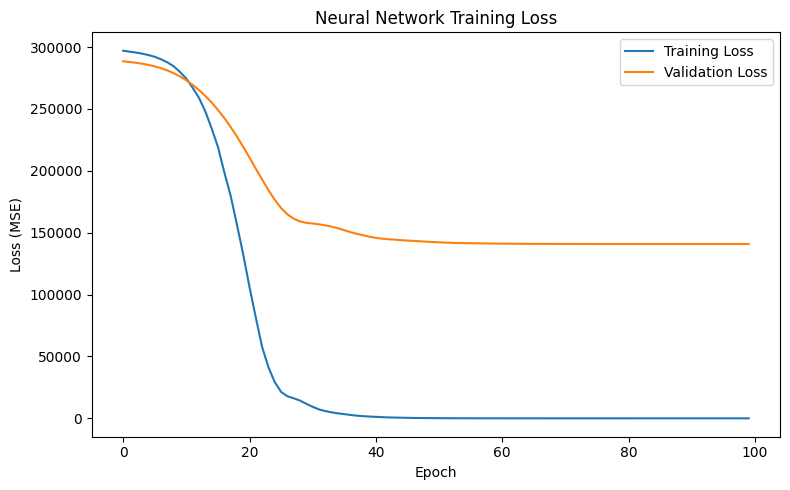

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


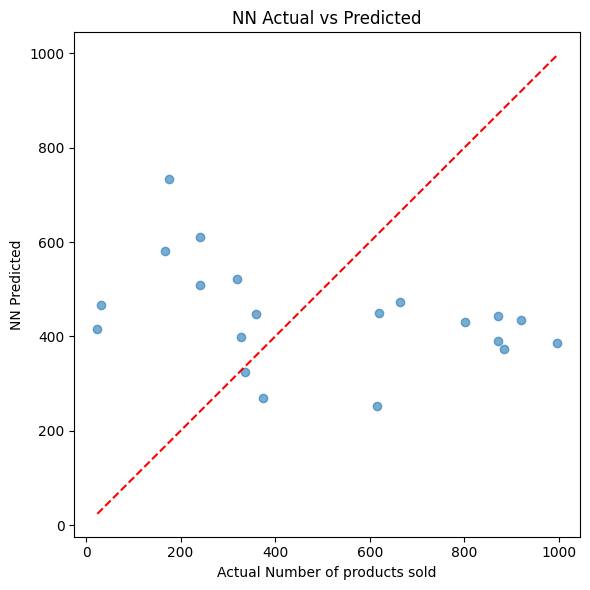

Saved:
 - reports/nn_loss_curve.png
 - reports/nn_actual_vs_pred.png


In [26]:
# ============================
# Save Neural Network Loss Plot
# ============================

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Neural Network Training Loss")
plt.legend()
plt.tight_layout()
plt.savefig("../reports/nn_loss_curve.png", bbox_inches="tight")
plt.show()

# =======================================
# NN Actual vs Predicted (Test Data)
# =======================================
pred_nn = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_nn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Number of products sold")
plt.ylabel("NN Predicted")
plt.title("NN Actual vs Predicted")
plt.tight_layout()
plt.savefig("../reports/nn_actual_vs_pred.png", bbox_inches="tight")
plt.show()

print("Saved:")
print(" - reports/nn_loss_curve.png")
print(" - reports/nn_actual_vs_pred.png")


In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# NN predictions
pred_nn = model.predict(X_test_scaled).flatten()

print("NN MSE:", mean_squared_error(y_test, pred_nn))
print("NN MAE:", mean_absolute_error(y_test, pred_nn))
print("NN R2:", r2_score(y_test, pred_nn))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
NN MSE: 135621.71875
NN MAE: 326.0419921875
NN R2: -0.42114150524139404
